In [1]:
import torch

In [2]:
import git
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
!cd yolov5
!pip install -r requirements.txt

The system cannot find the path specified.


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\sachi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-8 Python-3.11.5 torch-2.1.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
import uuid
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images')

labels = ['excited', 'bored']

number_images = 20

cap= cv2.VideoCapture(0)
for label in labels:
    print("Collecting labels for {}".format(label))
    time.sleep(5)
    for image_no in range(number_images):
        print("Collecting data for {}, image_number {}".format(label, image_no))
        
        ret, frame = cap.read()
        
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        cv2.imwrite(image_name, frame)
        
        cv2.imshow('Image Collection', frame)
        
        time.sleep(2)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [7]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-270-g4733b4d Python-3.11.5 torch-2.1.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sachi/.cache\torch\hub\master.zip
YOLOv5  2024-1-9 Python-3.11.5 torch-2.1.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
img = os.path.join('data', 'images', 'bored.4fa61d93-ae9b-11ee-96f7-745d223d2c8f.jpg')

In [10]:
results = model(img)

In [11]:
results.print()

image 1/1: 480x640 1 bored
Speed: 69.8ms pre-process, 264.1ms inference, 8.6ms NMS per image at shape (1, 3, 480, 640)


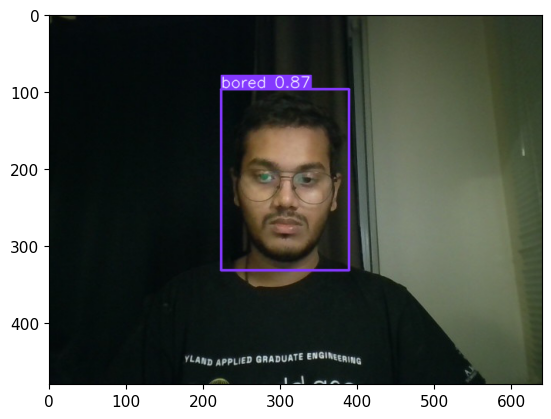

In [12]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

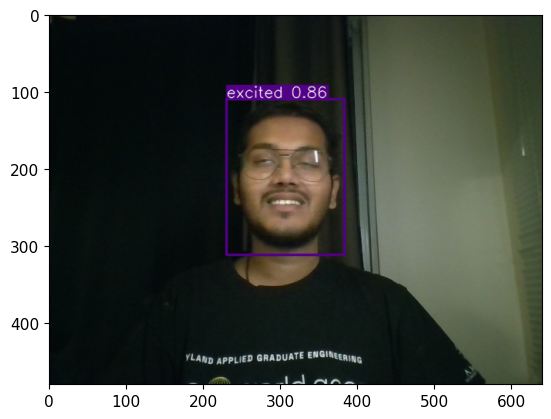

In [19]:
img = os.path.join('data', 'images', 'excited.47d78325-ae9b-11ee-94a3-745d223d2c8f.jpg')
results = model(img)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()